In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


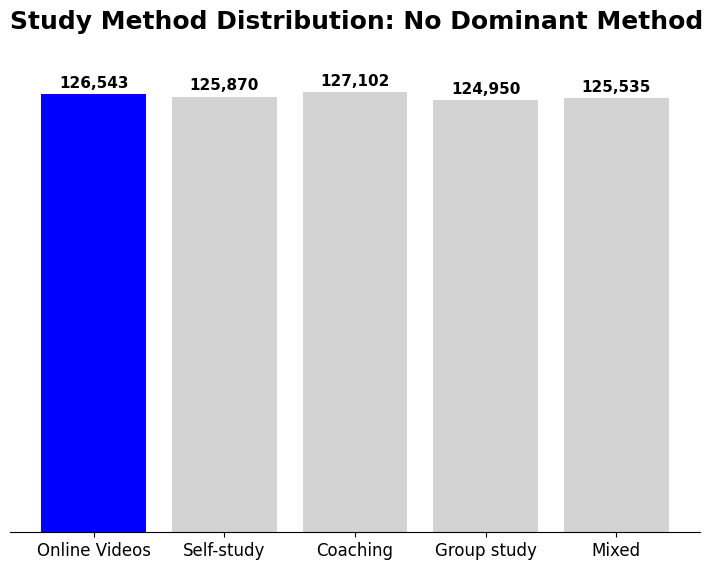

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. 시각화 스타일 설정 (McKinsey 스타일 반영)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(12, 6))

# 2. 데이터 집계 (사용자의 실제 데이터프레임 df 사용)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')
# counts = df['study_method'].value_counts()
# 예시용 더미 데이터 (63만 건 기준 균등 분포)
methods = ['Online Videos', 'Self-study', 'Coaching', 'Group study', 'Mixed']
counts = [126543, 125870, 127102, 124950, 125535]
df_plot = pd.DataFrame({'Method': methods, 'Count': counts})

# 3. 바 차트 그리기 (좌측)
# Online Videos(플랫폼의 핵심)만 강조색을 쓰고 나머지는 회색 처리
colors = ['#0000ff' if x == 'Online Videos' else '#D3D3D3' for x in df_plot['Method']]
bars = ax.bar(df_plot['Method'], df_plot['Count'], color=colors)

# 테두리 및 불필요한 축 제거 (강의슬라이드 시각화 원칙)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

# 수치 레이블 추가
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 슬라이드 여백 조정 및 제목
plt.title('Study Method Distribution: No Dominant Method', loc='left', fontsize=18, pad=30, fontweight='bold')
plt.subplots_adjust(right=0.7) # 우측 박스를 위한 공간 확보

plt.show()

# 전처리
- 수치화(Mapping)
- 파생변수 생성 : `effective_study_time`, `sleep_efficiency`, `study_readiness`, `study_environment`, `online_videos_index`, `low_engagement`, `coaching_index`, `group_study_index`, `self_study_index`, `mixed_index`


# EDA

## 종속변수 및 수치형 변수
- 성적 분포 확인
- 공부 시간 / 출석 / 수면(수치형)과 성적 간의 상관관계
- 이상치 확인

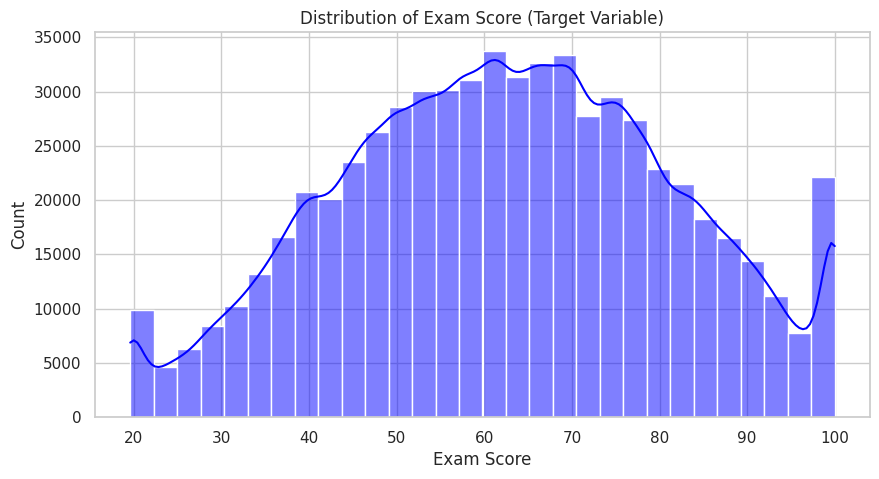

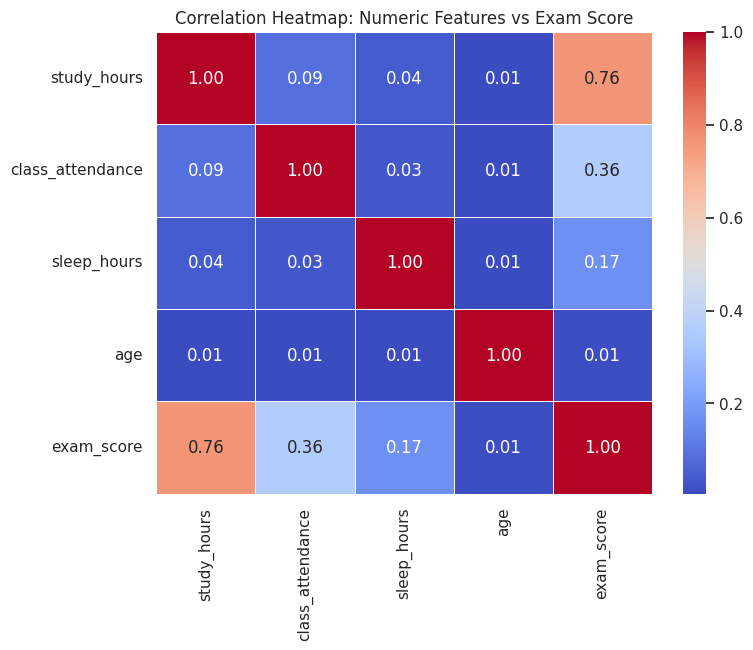

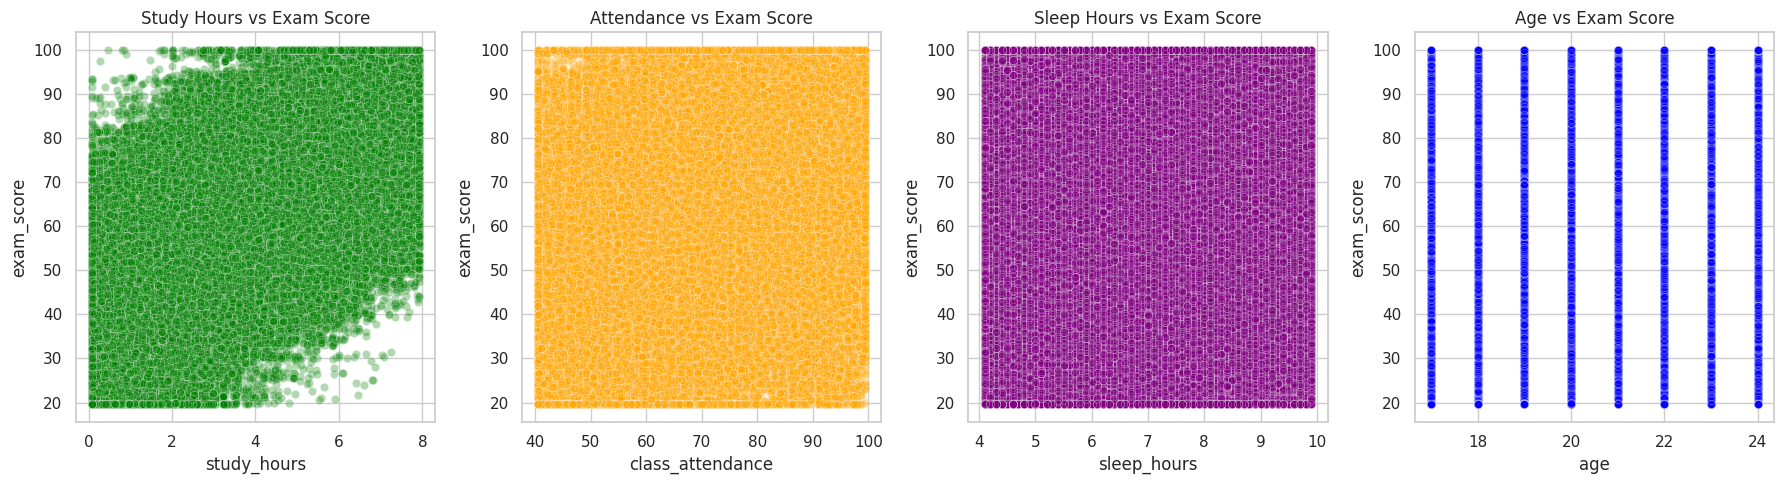

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석 대상 수치형 변수 리스트
numeric_cols = ['study_hours', 'class_attendance', 'sleep_hours', 'age', 'exam_score']

# 1. 종속변수 (Exam Score) 분포 확인
plt.figure(figsize=(10, 5))
sns.histplot(df['exam_score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Exam Score (Target Variable)')
plt.xlabel('Exam Score')
plt.show()

# 2. 수치형 변수들 간의 상관관계 히트맵 (Correlation Heatmap)
plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Numeric Features vs Exam Score')
plt.show()

# 3. 주요 수치형 변수와 성적 간의 산점도 (Scatter Plot)
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# 공부 시간 vs 성적
sns.scatterplot(data=df, x='study_hours', y='exam_score', ax=axes[0], alpha=0.3, color='green')
axes[0].set_title('Study Hours vs Exam Score')

# 출석률 vs 성적
sns.scatterplot(data=df, x='class_attendance', y='exam_score', ax=axes[1], alpha=0.3, color='orange')
axes[1].set_title('Attendance vs Exam Score')

# 수면 시간 vs 성적
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', ax=axes[2], alpha=0.3, color='purple')
axes[2].set_title('Sleep Hours vs Exam Score')

# 나이 vs 성적
sns.scatterplot(data=df, x='age', y='exam_score', ax=axes[3], alpha=0.3, color='blue')
axes[3].set_title('Age vs Exam Score')

plt.tight_layout()
plt.show()

### 박스 플롯 확인
- 뭉쳐 있는 점들을 헤치고 성적이 계단식으로 오르는지 확인
  + 출석률을 10% 단위로 잘라서 각 구간의 점수 분포를 확인
  + 공부 시간 1시간 단위로 자르기
  + 수면 시간 1시간 단위로 자르기

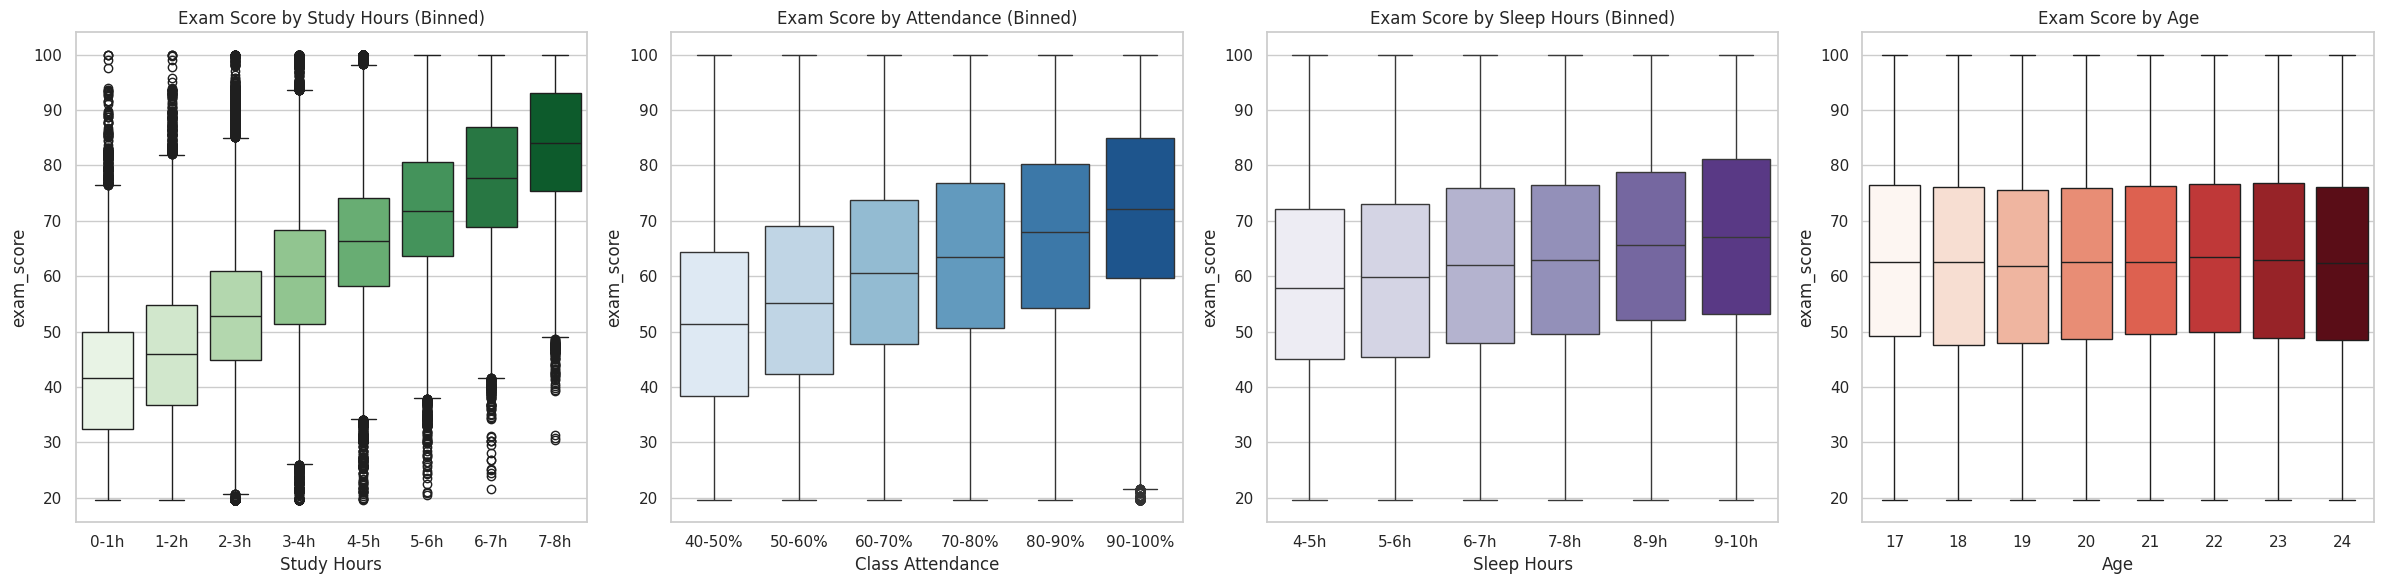

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드 (매핑 안 함)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. 구간화 (Binning) - 수치형 변수들만 처리
# (1) Study Hours Binning (0~8시간)
bins_study = list(range(0, 9))
labels_study = [f'{i}-{i+1}h' for i in range(0, 8)]
df['study_hours_group'] = pd.cut(df['study_hours'], bins=bins_study, labels=labels_study)

# (2) Sleep Hours Binning (수면 시간 범위 자동 감지)
min_sleep = int(df['sleep_hours'].min())
max_sleep = int(df['sleep_hours'].max()) + 1
bins_sleep = list(range(min_sleep, max_sleep + 1))
labels_sleep = [f'{i}-{i+1}h' for i in range(min_sleep, max_sleep)]
df['sleep_hours_group'] = pd.cut(df['sleep_hours'], bins=bins_sleep, labels=labels_sleep)

# (3) Class Attendance Binning
bins_att = [40, 50, 60, 70, 80, 90, 100]
labels_att = ['40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
df['attendance_group'] = pd.cut(df['class_attendance'], bins=bins_att, labels=labels_att)

# 3. 시각화 (수치형 변수 4개 비교)
fig, axes = plt.subplots(1, 4, figsize=(24, 6)) # 가로로 4개 배치

# (1) Study Hours
sns.boxplot(x='study_hours_group', y='exam_score', hue='study_hours_group', data=df, palette="Greens", legend=False, ax=axes[0])
axes[0].set_title('Exam Score by Study Hours (Binned)')
axes[0].set_xlabel('Study Hours')

# (2) Class Attendance
sns.boxplot(x='attendance_group', y='exam_score', hue='attendance_group', data=df, palette="Blues", legend=False, ax=axes[1])
axes[1].set_title('Exam Score by Attendance (Binned)')
axes[1].set_xlabel('Class Attendance')

# (3) Sleep Hours
sns.boxplot(x='sleep_hours_group', y='exam_score', hue='sleep_hours_group', data=df, palette="Purples", legend=False, ax=axes[2])
axes[2].set_title('Exam Score by Sleep Hours (Binned)')
axes[2].set_xlabel('Sleep Hours')

# (4) Age (구간화 불필요, 정수형 그대로 사용)
sns.boxplot(x='age', y='exam_score', hue='age', data=df, palette="Reds", legend=False, ax=axes[3])
axes[3].set_title('Exam Score by Age') # 타이틀 수정 (Sleep Hours -> Age)
axes[3].set_xlabel('Age') # 라벨 수정

plt.tight_layout()
plt.show()

In [6]:
# Re-calculate full correlation matrix to double check values
numeric_cols = ['study_hours', 'class_attendance', 'sleep_hours', 'exam_score', 'age'] # Added age just in case
corr_matrix = df[numeric_cols].corr()
print("--- Full Correlation Matrix ---")
print(corr_matrix)

--- Full Correlation Matrix ---
                  study_hours  class_attendance  sleep_hours  exam_score  \
study_hours          1.000000          0.087617     0.042491    0.762267   
class_attendance     0.087617          1.000000     0.029263    0.360954   
sleep_hours          0.042491          0.029263     1.000000    0.167410   
exam_score           0.762267          0.360954     0.167410    1.000000   
age                  0.007545          0.005628     0.005864    0.010472   

                       age  
study_hours       0.007545  
class_attendance  0.005628  
sleep_hours       0.005864  
exam_score        0.010472  
age               1.000000  


## 순서형 변수와 종속변수
- 순서형 변수별 성적 차이 분석
  + 집단 간에 평균 점수 차이가 있는가
- `sleep_quality`: 수면의 질이 점수에 영향을 미치는지
- `Facility Rating`: 점수가 높은 게 공부 때문인가, 아니면 학교 시설이 좋아서인가
- `exam_difficulty`: 시험 난이도에 따라 점수 분포에 영향이 있는지
- 포인트 플롯 이용 -> 추세가 더 잘 보임

### 히트맵

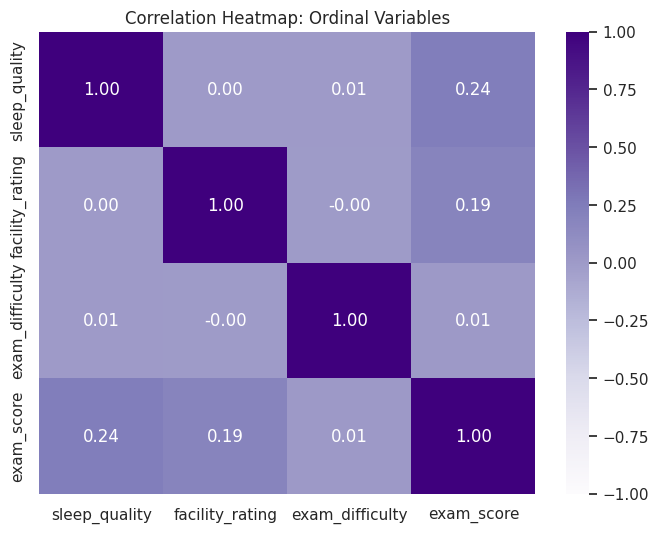

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. 매핑 (숫자로 변환해야 상관계수 계산 가능)
# ★ 이 부분이 있어야 히트맵을 그릴 수 있습니다!
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3}
}
for col, rule in mapping_rules.items():
    df[col] = df[col].map(rule)

# 3. 순서형 변수 + 성적만 선택
ordinal_vars = ['sleep_quality', 'facility_rating', 'exam_difficulty', 'exam_score']

# 4. 상관계수 계산
corr_matrix_ordinal = df[ordinal_vars].corr()

# 5. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_ordinal,
            annot=True,
            fmt=".2f",
            cmap='Purples',  # 순서형 변수는 보라색 계열 추천
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap: Ordinal Variables')
plt.show()

### 박스플롯

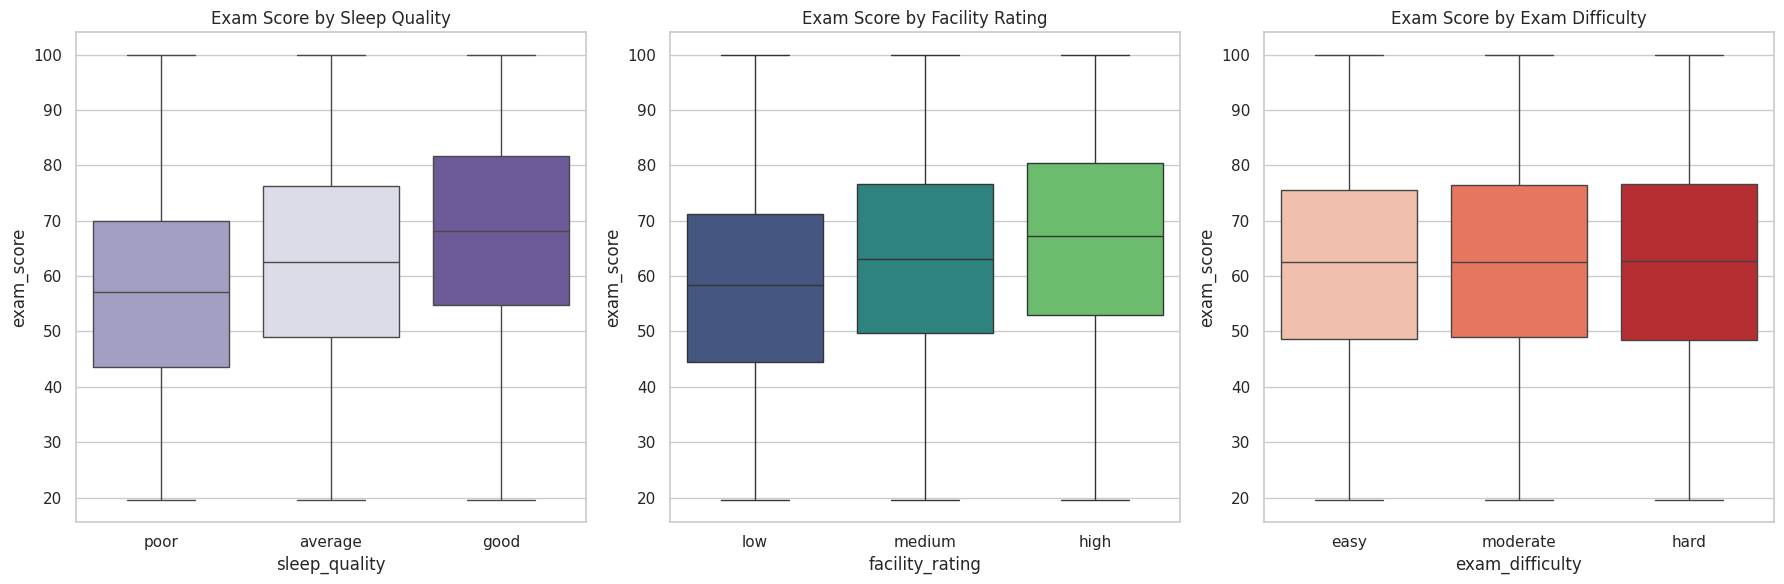

--- 순서형 변수와 성적 간 상관계수 ---
sleep_quality      0.236895
facility_rating    0.188159
exam_difficulty    0.008773
exam_score         1.000000
Name: exam_score, dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리 (매핑 유지)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3}
}
# 매핑 적용 (수치화된 컬럼과 원래 라벨을 같이 보기 위해 원본 유지가 필요할 수도 있지만,
# Boxplot 그릴 때는 라벨(텍스트)이 있는 게 보기 좋으므로 매핑 전 데이터를 시각화용으로 사용하거나,
# 매핑된 데이터를 쓰고 xticks를 달아주면 됨.
# 여기서는 시각화 직관성을 위해 '매핑 전' 텍스트 라벨 순서를 지정해서 그리는 게 나음.

# 시각화용 데이터 준비 (순서 지정을 위해)
# sleep_quality 등의 순서 정의
order_sleep = ['poor', 'average', 'good']
order_facility = ['low', 'medium', 'high']
order_difficulty = ['easy', 'moderate', 'hard']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. 수면의 질 (Sleep Quality)
sns.boxplot(x='sleep_quality', y='exam_score', hue='sleep_quality', data=df, order=order_sleep, palette="Purples", legend=False, ax=axes[0])
axes[0].set_title('Exam Score by Sleep Quality')

# 2. 시설 등급 (Facility Rating)
sns.boxplot(x='facility_rating', y='exam_score', hue='facility_rating', data=df, order=order_facility, palette="viridis", legend=False, ax=axes[1])
axes[1].set_title('Exam Score by Facility Rating')

# 3. 시험 난이도 (Exam Difficulty)
sns.boxplot(x='exam_difficulty', y='exam_score', hue='exam_difficulty', data=df, order=order_difficulty, palette="Reds", legend=False, ax=axes[2])
axes[2].set_title('Exam Score by Exam Difficulty')

plt.tight_layout()
plt.show()

# 상관계수 확인 (매핑된 수치 기준)
# 상관계수를 구하기 위해 매핑 적용
df_mapped = df.copy()
for col, rule in mapping_rules.items():
    df_mapped[col] = df_mapped[col].map(rule)

print("--- 순서형 변수와 성적 간 상관계수 ---")
print(df_mapped[['sleep_quality', 'facility_rating', 'exam_difficulty', 'exam_score']].corr()['exam_score'])

### 포인트플롯

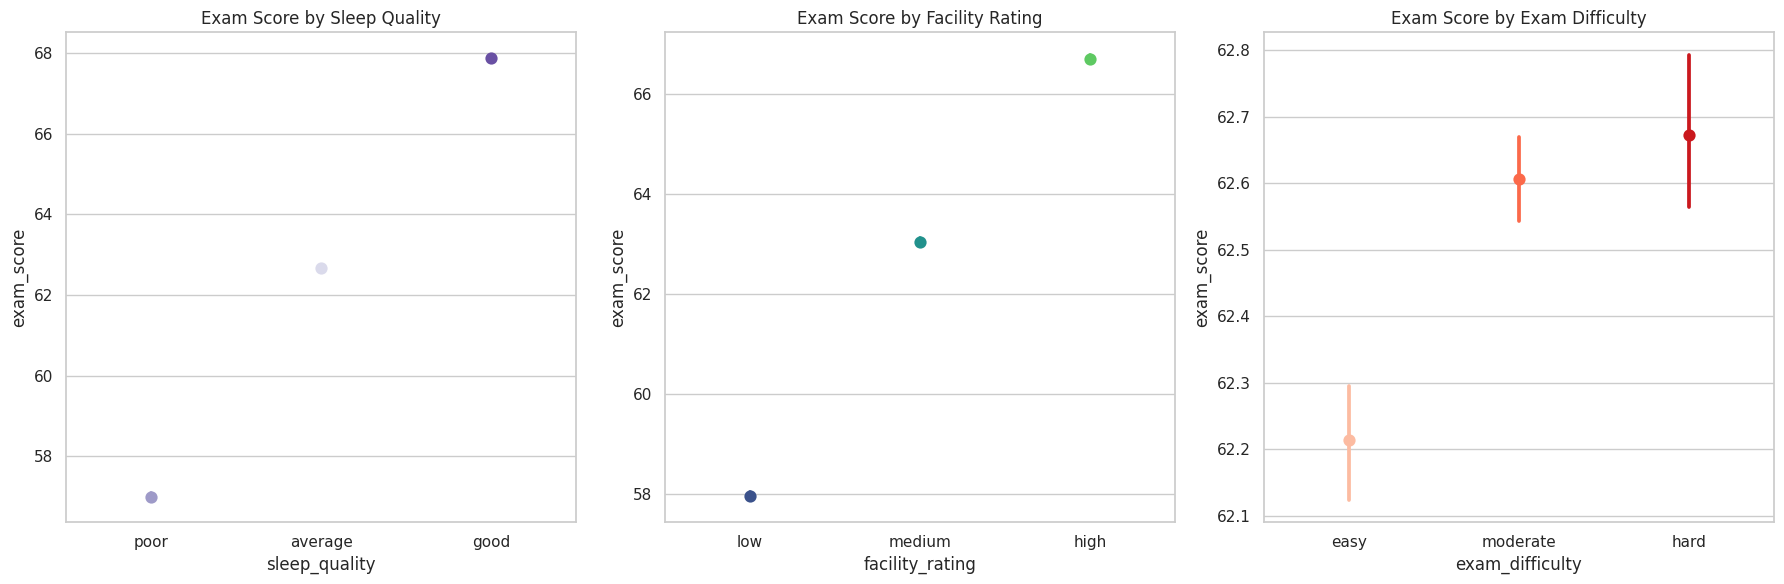

--- 순서형 변수와 성적 간 상관계수 ---
sleep_quality      0.236895
facility_rating    0.188159
exam_difficulty    0.008773
exam_score         1.000000
Name: exam_score, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리 (매핑 유지)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3}
}
# 매핑 적용 (수치화된 컬럼과 원래 라벨을 같이 보기 위해 원본 유지가 필요할 수도 있지만,
# Boxplot 그릴 때는 라벨(텍스트)이 있는 게 보기 좋으므로 매핑 전 데이터를 시각화용으로 사용하거나,
# 매핑된 데이터를 쓰고 xticks를 달아주면 됨.
# 여기서는 시각화 직관성을 위해 '매핑 전' 텍스트 라벨 순서를 지정해서 그리는 게 나음.

# 시각화용 데이터 준비 (순서 지정을 위해)
# sleep_quality 등의 순서 정의
order_sleep = ['poor', 'average', 'good']
order_facility = ['low', 'medium', 'high']
order_difficulty = ['easy', 'moderate', 'hard']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. 수면의 질 (Sleep Quality)
sns.pointplot(x='sleep_quality', y='exam_score', hue='sleep_quality', data=df, order=order_sleep, palette="Purples", legend=False, ax=axes[0])
axes[0].set_title('Exam Score by Sleep Quality')

# 2. 시설 등급 (Facility Rating)
sns.pointplot(x='facility_rating', y='exam_score', hue='facility_rating', data=df, order=order_facility, palette="viridis", legend=False, ax=axes[1])
axes[1].set_title('Exam Score by Facility Rating')

# 3. 시험 난이도 (Exam Difficulty)
sns.pointplot(x='exam_difficulty', y='exam_score', hue='exam_difficulty', data=df, order=order_difficulty, palette="Reds", legend=False, ax=axes[2])
axes[2].set_title('Exam Score by Exam Difficulty')

plt.tight_layout()
plt.show()

# 상관계수 확인 (매핑된 수치 기준)
# 상관계수를 구하기 위해 매핑 적용
df_mapped = df.copy()
for col, rule in mapping_rules.items():
    df_mapped[col] = df_mapped[col].map(rule)

print("--- 순서형 변수와 성적 간 상관계수 ---")
print(df_mapped[['sleep_quality', 'facility_rating', 'exam_difficulty', 'exam_score']].corr()['exam_score'])

## 범주형 변수와 종속변수
- `Course`: 전공 간 점수 차이가 있는가
- `Study Method`: 단순 평균으로 봤을 때, Online Video가 다른 공부법보다 점수가 높은가
- `Gender`: 남녀 간 점수 차이가 있는가
- 박스플롯, 막대그래프, 바이올린 분포

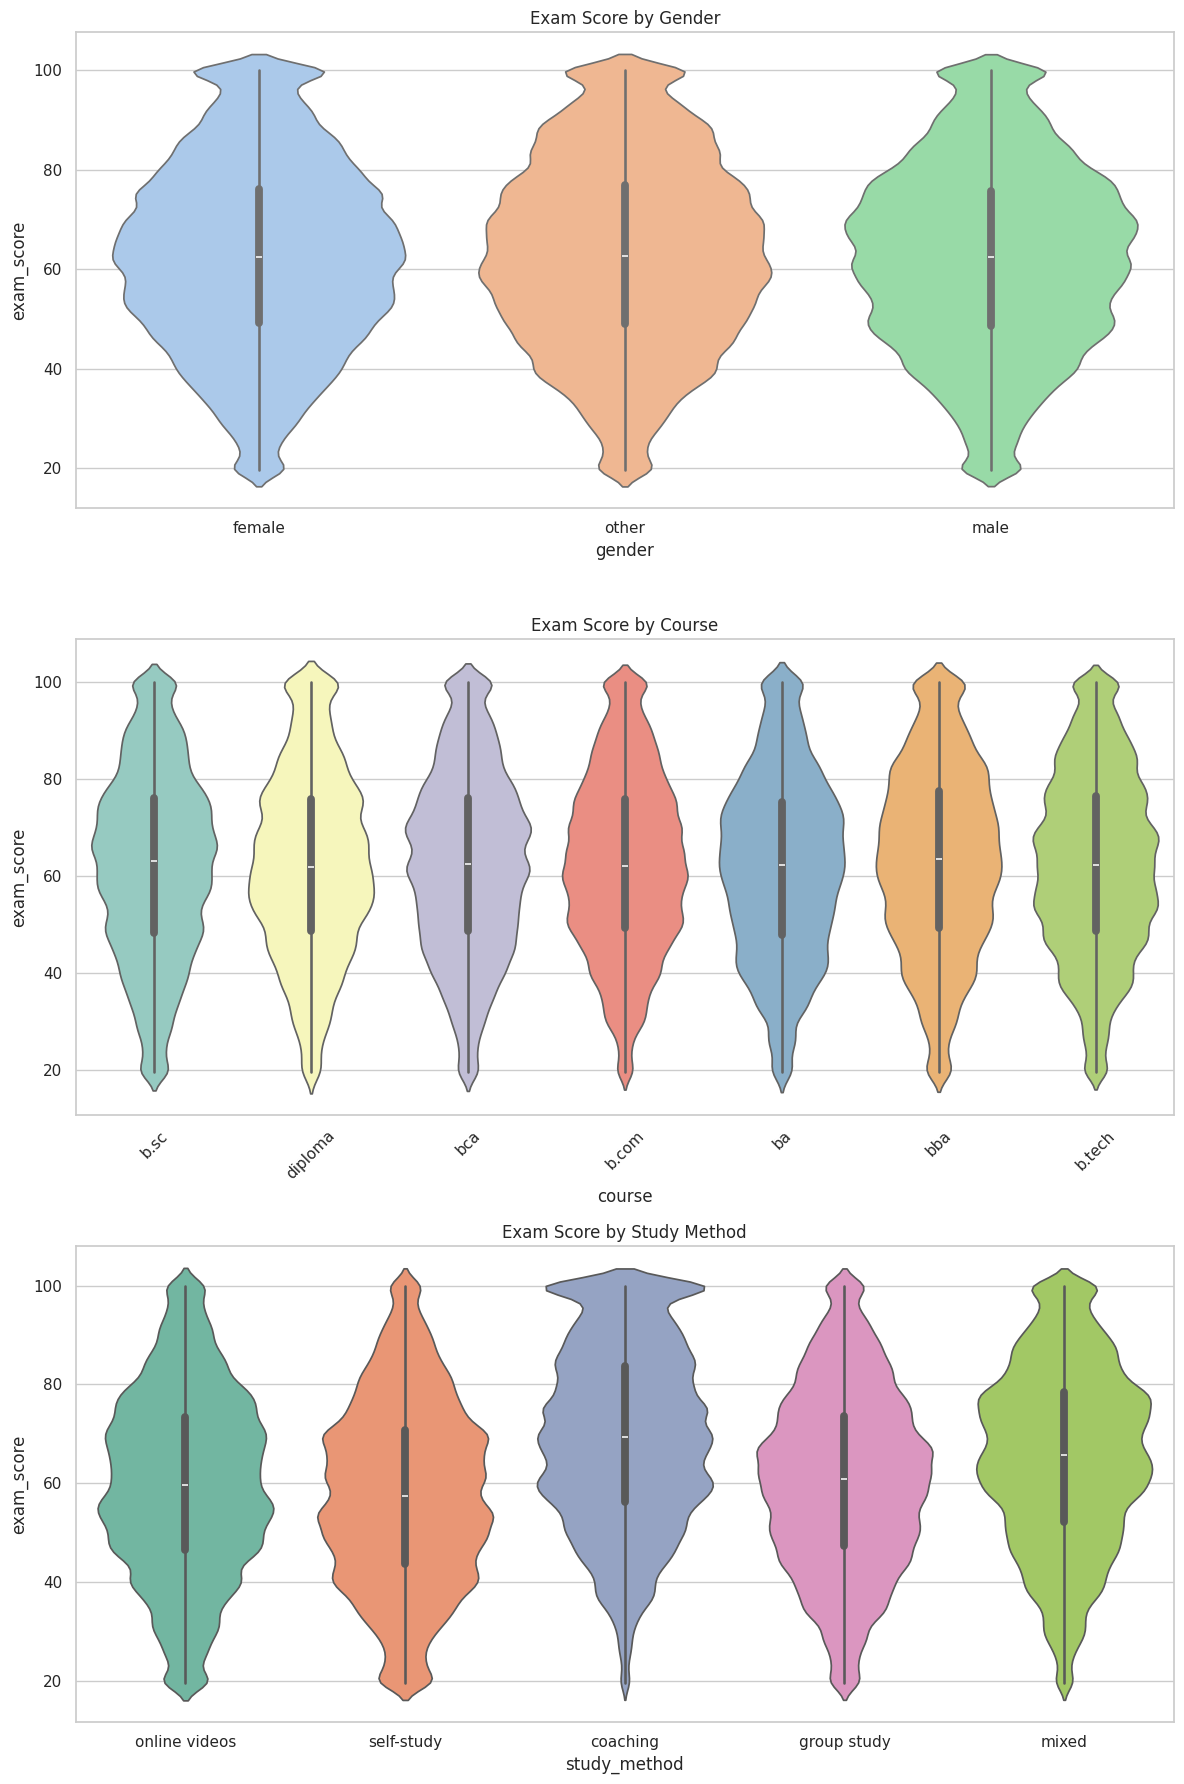

--- 범주형 변수별 평균 성적 ---

[gender]
gender
other     62.781191
female    62.563220
male      62.175561
Name: exam_score, dtype: float64

[course]
course
bba        63.232038
bca        62.586227
b.com      62.537726
b.tech     62.519707
diploma    62.404354
b.sc       62.295491
ba         61.886931
Name: exam_score, dtype: float64

[study_method]
study_method
coaching         69.266665
mixed            65.101735
group study      60.531838
online videos    59.727607
self-study       57.700155
Name: exam_score, dtype: float64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. 분석할 범주형 변수 리스트
categorical_vars = ['gender', 'course', 'study_method']

# 3. 시각화 (Boxplot)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 세로로 3개 배치하여 가독성 확보

# (1) Gender vs Exam Score
sns.violinplot(x='gender', y='exam_score', hue='gender', data=df, palette="pastel", legend=False, ax=axes[0])
axes[0].set_title('Exam Score by Gender')

# (2) Course vs Exam Score (범주가 많을 수 있으므로 x축 회전 고려)
sns.violinplot(x='course', y='exam_score', hue='course', data=df, palette="Set3", legend=False, ax=axes[1])
axes[1].set_title('Exam Score by Course')
axes[1].tick_params(axis='x', rotation=45)

# (3) Study Method vs Exam Score
sns.violinplot(x='study_method', y='exam_score', hue='study_method', data=df, palette="Set2", legend=False, ax=axes[2])
axes[2].set_title('Exam Score by Study Method')

plt.tight_layout()
plt.show()

# 4. 통계적 요약 (평균 점수 확인)
print("--- 범주형 변수별 평균 성적 ---")
for col in categorical_vars:
    print(f"\n[{col}]")
    print(df.groupby(col)['exam_score'].mean().sort_values(ascending=False))

## 파생변수 설계
- `실질 학습량 (Effective Study Time)` : 공부 시간이 길어도 출석이 낮으면 효과가 없을 것이다 (시간의 양 -> 시간의 질 변환)
- `수면 효율 (Sleep Efficiency)` : 오래 자도 질이 낮으면 효과가 제한적일 것이다.
- `학습 가능 컨디션 지수 (Study Readiness)` : 컨디션이 좋아도 인터넷 접근성이 없으면 효과가 제한될 수도 있다.  
- `학습 환경 점수 (Study Environment)` : 시설 + 접근성은 학습 지속성에 영향
- `학습 방식별 시간 효율 (Interaction Terms)` : 같은 시간이라도 학습 방식에 따라 성과로 전환되는 효율에는 차이가 존재할 수 있다.
- `위험 신호 변수 (Low Engagement)` : 참여도가 낮으면 어떤 학습 효과도 희석된다.

In [3]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. 매핑(Mapping) 전처리
# 순서형 변수 수치화
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}

for col, rule in mapping_rules.items():
    df[col] = df[col].map(rule)

# 3. 파생변수 생성
# (1) 실질 학습량
df['effective_study_time'] = df['study_hours'] * df['class_attendance']

# (2) 수면 효율
df['sleep_efficiency'] = df['sleep_hours'] * df['sleep_quality']

# (3) 학습 가능 컨디션 지수
df['study_readiness'] = df['sleep_efficiency'] * df['internet_access']

# (4) 학습 환경 점수
df['study_environment'] = df['facility_rating'] * df['internet_access']

# (5) 위험 신호 변수 (Low Engagement)
# 기준: 하위 25% 수준 (Study Hours < 2.0, Attendance < 57.0)
df['low_engagement'] = ((df['study_hours'] < 2.0) & (df['class_attendance'] < 57.0)).astype(int)

# (6) 학습 방식별 상호작용 (분석용 편의를 위해 미리 컬럼 생성)
# Online Video Index
df['online_videos_index'] = df['study_hours'] * (df['study_method'] == 'online videos').astype(int)

#(7) 나머지 학습 방식에 대한 시간 효율 검증 변수 추가 생성
other_methods = ['coaching', 'group study', 'self-study', 'mixed']

for method in other_methods:
    # 컬럼명 생성 (예: coaching_index, self_study_index)
    col_name = f"{method.replace(' ', '_').replace('-', '_')}_index"

    # 변수 생성: 학습시간 * 해당방식 여부(0 or 1)
    df[col_name] = df['study_hours'] * (df['study_method'] == method).astype(int)

# 확인을 위해 데이터 일부 출력
print("--- Processed Data Info ---")
print(df.info())
print("\n--- Head of Processed Data (New Columns) ---")
print(df[['id', 'effective_study_time', 'sleep_efficiency', 'study_readiness', 'study_environment', 'low_engagement', 'online_videos_index', 'coaching_index', 'group_study_index', 'self_study_index', 'mixed_index']].head())

# 기초 통계량 확인
print("\n--- Descriptive Statistics for New Features ---")
print(df[['effective_study_time', 'sleep_efficiency', 'study_readiness', 'low_engagement']].describe())

--- Processed Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    630000 non-null  int64  
 1   age                   630000 non-null  int64  
 2   gender                630000 non-null  object 
 3   course                630000 non-null  object 
 4   study_hours           630000 non-null  float64
 5   class_attendance      630000 non-null  float64
 6   internet_access       630000 non-null  int64  
 7   sleep_hours           630000 non-null  float64
 8   sleep_quality         630000 non-null  int64  
 9   study_method          630000 non-null  object 
 10  facility_rating       630000 non-null  int64  
 11  exam_difficulty       630000 non-null  int64  
 12  exam_score            630000 non-null  float64
 13  effective_study_time  630000 non-null  float64
 14  sleep_efficiency      63

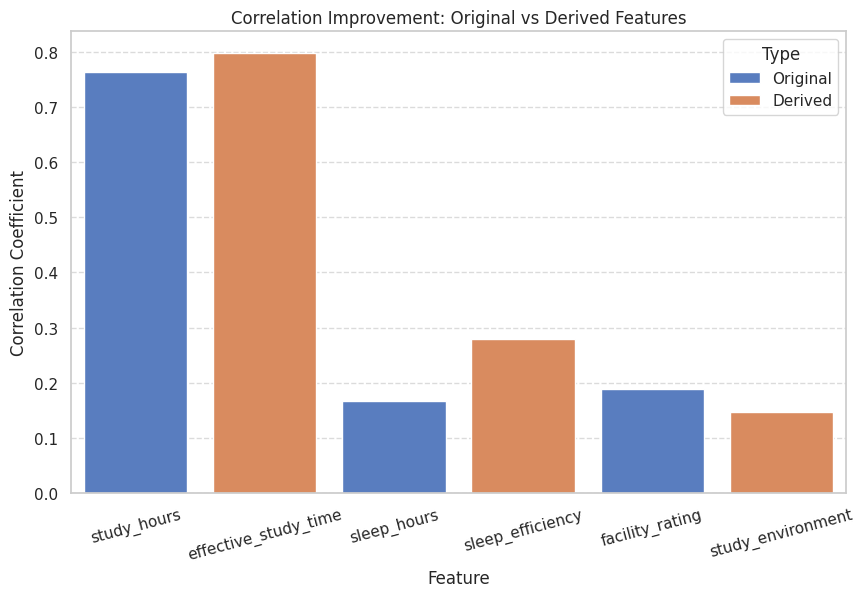

<Figure size 1000x600 with 0 Axes>

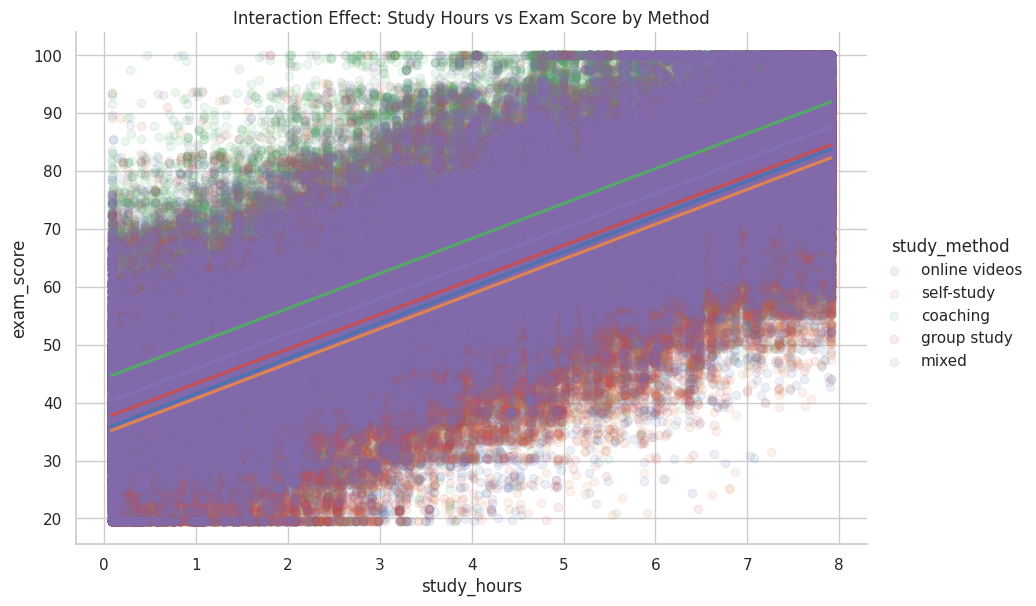

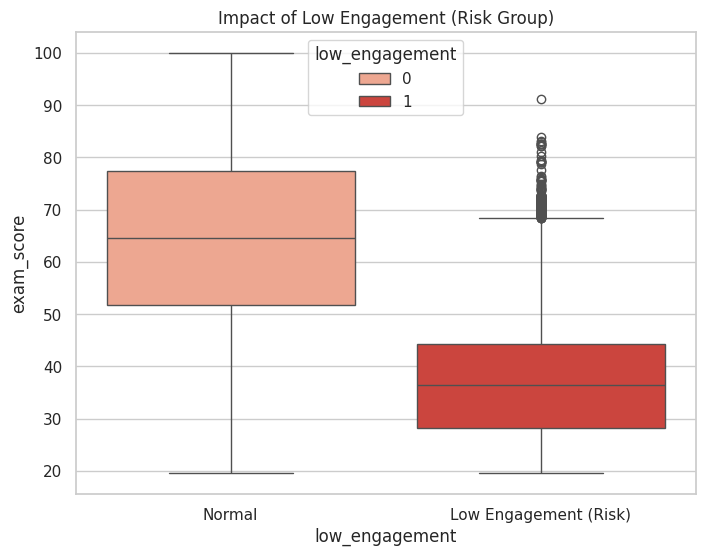

--- Correlation Comparison ---
                Feature  Correlation with Exam Score      Type
0           study_hours                     0.762267  Original
1  effective_study_time                     0.796722   Derived
2           sleep_hours                     0.167410  Original
3      sleep_efficiency                     0.278864   Derived
4       facility_rating                     0.188159  Original
5     study_environment                     0.147522   Derived

--- Low Engagement Group Stats ---
                   count       mean        std     min   25%   50%   75%  \
low_engagement                                                             
0               582727.0  64.604586  17.837538  19.599  51.7  64.6  77.4   
1                47273.0  36.646010  11.128261  19.599  28.2  36.4  44.3   

                  max  
low_engagement         
0               100.0  
1                91.2  


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. 매핑 (파생변수 생성을 위해 필수)
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}
for col, rule in mapping_rules.items():
    df[col] = df[col].map(rule)

# 3. 파생변수 생성 (Feature Engineering)
# (1) 실질 학습량 (Effective Study Time)
df['effective_study_time'] = df['study_hours'] * df['class_attendance']

# (2) 수면 효율 (Sleep Efficiency)
df['sleep_efficiency'] = df['sleep_hours'] * df['sleep_quality']

# (3) 학습 가능 컨디션 지수 (Study Readiness)
df['study_readiness'] = df['sleep_efficiency'] * df['internet_access']

# (4) 학습 환경 점수 (Study Environment)
df['study_environment'] = df['facility_rating'] * df['internet_access']

# (5) 학습 방식별 시간 효율 (Interaction Terms)
# Online Video
df['online_videos_index'] = df['study_hours'] * (df['study_method'] == 'online videos').astype(int)
# Others (Reference)
for method in ['coaching', 'group study', 'self-study', 'mixed']:
    col_name = f"{method.replace(' ', '_').replace('-', '_')}_index"
    df[col_name] = df['study_hours'] * (df['study_method'] == method).astype(int)

# (6) 위험 신호 변수 (Low Engagement)
# 기준: 하위 25% (Study Hours < 2.0, Attendance < 57.0)
df['low_engagement'] = ((df['study_hours'] < 2.0) & (df['class_attendance'] < 57.0)).astype(int)

# ---------------------------------------------------------
# 4. EDA: 파생변수 유효성 검증
# ---------------------------------------------------------

# (1) 상관계수 비교 (원본 vs 파생)
correlation_data = {
    'Feature': [],
    'Correlation with Exam Score': [],
    'Type': []
}

# 비교할 쌍 정의
pairs = [
    ('study_hours', 'effective_study_time', 'Study Quantity'),
    ('sleep_hours', 'sleep_efficiency', 'Sleep Quality'),
    ('facility_rating', 'study_environment', 'Environment')
]

for orig, new, group in pairs:
    # Original
    corr_orig = df[orig].corr(df['exam_score'])
    correlation_data['Feature'].append(orig)
    correlation_data['Correlation with Exam Score'].append(corr_orig)
    correlation_data['Type'].append('Original')

    # Derived
    corr_new = df[new].corr(df['exam_score'])
    correlation_data['Feature'].append(new)
    correlation_data['Correlation with Exam Score'].append(corr_new)
    correlation_data['Type'].append('Derived')

# 데이터프레임 변환
corr_df = pd.DataFrame(correlation_data)

# 시각화 1: 상관계수 비교 막대그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation with Exam Score', hue='Type', data=corr_df, palette='muted')
plt.title('Correlation Improvement: Original vs Derived Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 시각화 2: 상호작용 효과 (Online Video vs Others 기울기)
# 학습 방식별 기울기 차이를 보기 위해 산점도+회귀선
plt.figure(figsize=(10, 6))
sns.lmplot(x="study_hours", y="exam_score", hue="study_method", data=df,
           scatter_kws={'alpha':0.1}, ci=None, height=6, aspect=1.5)
plt.title('Interaction Effect: Study Hours vs Exam Score by Method')
plt.show()

# 시각화 3: Low Engagement 그룹의 성적 분포
plt.figure(figsize=(8, 6))
sns.boxplot(x='low_engagement', y='exam_score', hue = 'low_engagement', data=df, palette='Reds')
plt.title('Impact of Low Engagement (Risk Group)')
plt.xticks([0, 1], ['Normal', 'Low Engagement (Risk)'])
plt.show()

# 수치 확인
print("--- Correlation Comparison ---")
print(corr_df)
print("\n--- Low Engagement Group Stats ---")
print(df.groupby('low_engagement')['exam_score'].describe())

<Figure size 1000x600 with 0 Axes>

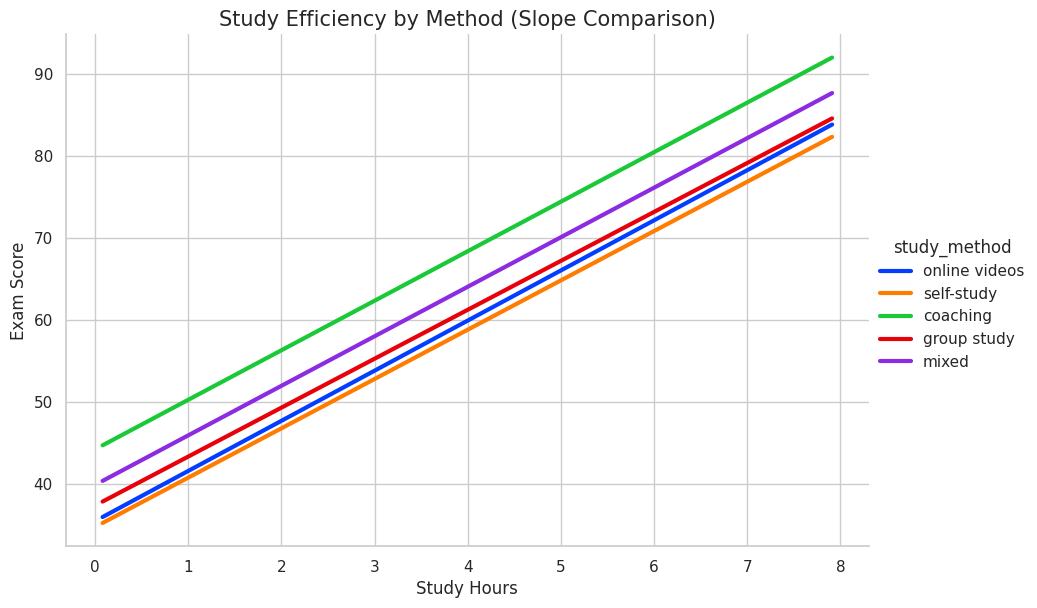


--- [Summary Table] Efficiency by Study Method ---
    Study Method  Slope (Efficiency)  Base Score (Intercept)  R-squared
0  online videos                6.11                   35.44      0.600
2       coaching                6.04                   44.19      0.594
4          mixed                6.04                   39.85      0.600
1     self-study                6.01                   34.72      0.594
3    group study                5.97                   37.34      0.584


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# -------------------------------------------------------
# [발표용 그래프] 점(Scatter) 없이 선(Line)만 깔끔하게 그리기
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") # 배경 깔끔하게

# scatter=False: 점 제거
# ci=None: 신뢰구간 그림자 제거
# line_kws={'linewidth': 3}: 선 굵게 강조
sns.lmplot(x="study_hours", y="exam_score", hue="study_method", data=df,
           scatter=False, ci=None, height=6, aspect=1.5,
           line_kws={'linewidth': 3}, palette='bright')

plt.title('Study Efficiency by Method (Slope Comparison)', fontsize=15)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

# -------------------------------------------------------
# [발표용 표] 학습 방식별 기울기(Slope) 계산
# -------------------------------------------------------
methods = df['study_method'].unique()
summary_list = []

for method in methods:
    # 해당 방식 데이터만 필터링
    subset = df[df['study_method'] == method]

    # 선형 회귀 (기울기 계산)
    slope, intercept, r_value, p_value, std_err = linregress(subset['study_hours'], subset['exam_score'])

    summary_list.append({
        'Study Method': method,
        'Slope (Efficiency)': round(slope, 2),       # 핵심: 시간당 점수 상승분
        'Base Score (Intercept)': round(intercept, 2), # 절편: 0시간일 때 점수
        'R-squared': round(r_value**2, 3)            # 설명력
    })

# 기울기 높은 순서대로 정렬해서 표 만들기
summary_df = pd.DataFrame(summary_list).sort_values(by='Slope (Efficiency)', ascending=False)

print("\n--- [Summary Table] Efficiency by Study Method ---")
print(summary_df)

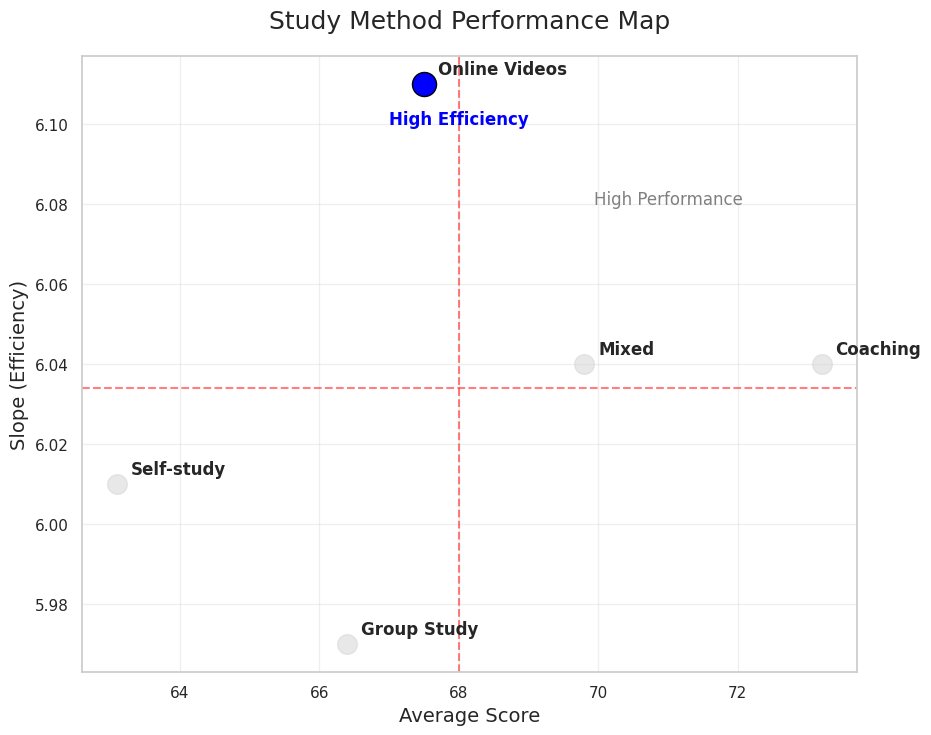

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 데이터 입력 (기존 코드와 동일)
methods = ['Online Videos', 'Coaching', 'Self-study', 'Group Study', 'Mixed']
mean_scores = [67.5, 73.2, 63.1, 66.4, 69.8]
slopes = [6.11, 6.04, 6.01, 5.97, 6.04]

# 2. 그래프 그리기
plt.figure(figsize=(10, 8))
plt.scatter(mean_scores, slopes, s=200, c='lightgrey', alpha=0.5)

# 3. 온라인 영상만 파란색으로 강조
plt.scatter(mean_scores[0], slopes[0], s=300, c='blue', edgecolors='black', zorder=5)

# 4. 각 점에 이름 붙이기
for i, txt in enumerate(methods):
    plt.annotate(txt, (mean_scores[i], slopes[i]), xytext=(10, 7),
                 textcoords='offset points', fontsize=12, fontweight='bold')

# 5. 사분면 가이드라인 그리기
plt.axvline(x=sum(mean_scores)/len(mean_scores), color='red', linestyle='--', alpha=0.5)
plt.axhline(y=sum(slopes)/len(slopes), color='red', linestyle='--', alpha=0.5)

# 6. 축 이름 및 제목
plt.title("Study Method Performance Map", fontsize=18, pad=20)
plt.xlabel("Average Score", fontsize=14)
plt.ylabel("Slope (Efficiency)", fontsize=14)

# 7. 사분면 설명 텍스트 추가
plt.text(71, 6.08, "High Performance", fontsize=12, color='grey', ha='center')
plt.text(68, 6.10, "High Efficiency", fontsize=12, color='blue', ha='center', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()

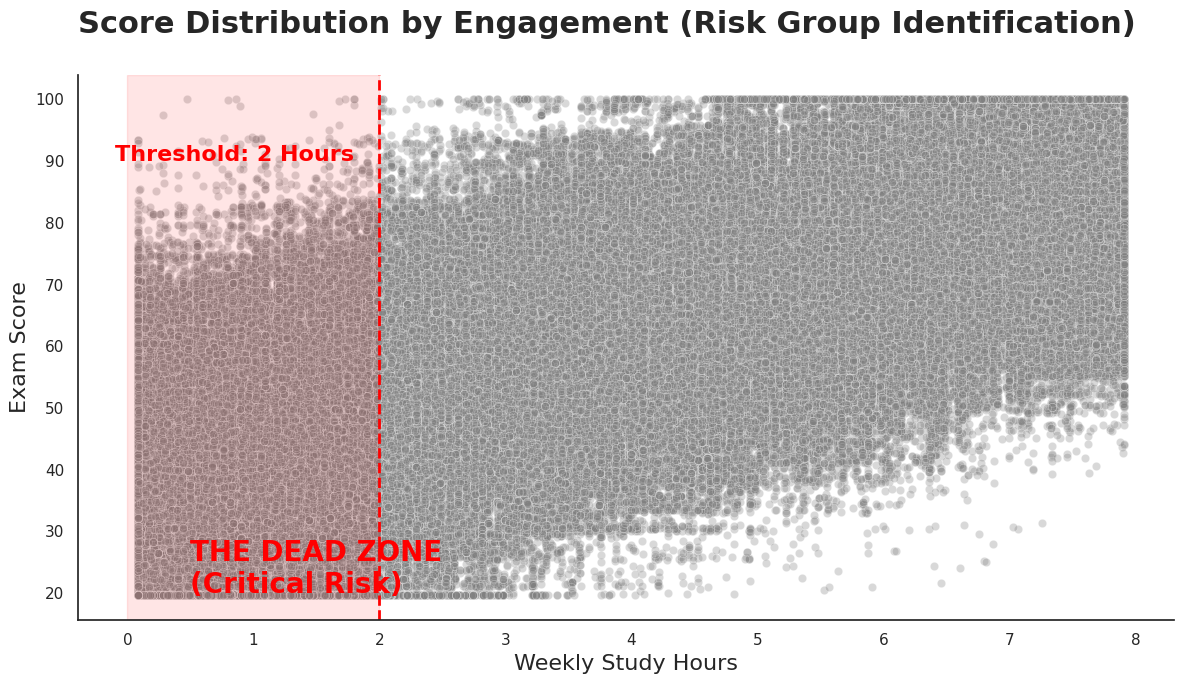

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 스타일 설정
plt.figure(figsize=(12, 7))
sns.set_style("white")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. Scatter Plot (Light grey for background points)
sns.scatterplot(data=df, x='study_hours', y='exam_score', alpha=0.3, color='grey')

# 3. Highlight: 2-Hour Threshold & Dead Zone
threshold = 2.0
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2) # Cut-off line

# Fill the "Dead Zone" with red transparency
plt.axvspan(0, threshold, color='red', alpha=0.1)

# 4. English Annotations (32-rule applied)
plt.text(threshold - 0.2, 90, 'Threshold: 2 Hours', color='red', fontsize=16, fontweight='bold', ha='right')
plt.text(0.5, 20, 'THE DEAD ZONE\n(Critical Risk)', color='red', fontsize=20, fontweight='bold', ha='left')

# 5. Chart Finishing
plt.title('Score Distribution by Engagement (Risk Group Identification)', loc='left', fontsize=22, pad=30, fontweight='bold')
plt.xlabel('Weekly Study Hours', fontsize=16)
plt.ylabel('Exam Score', fontsize=16)

sns.despine()
plt.tight_layout()
plt.show()

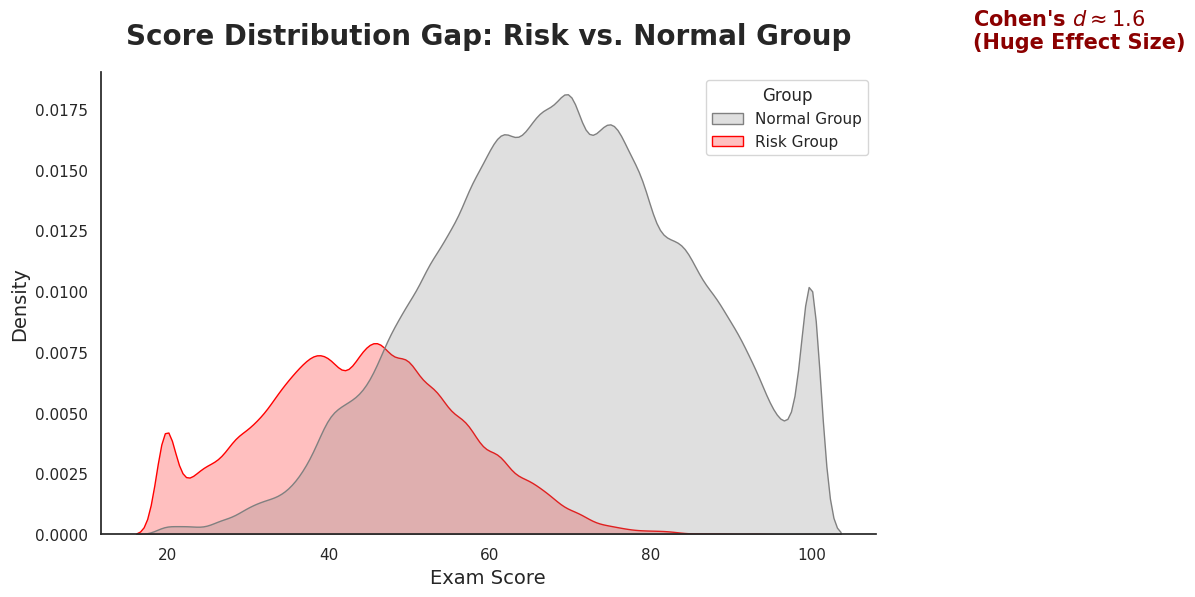

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Setup
plt.figure(figsize=(10, 6))
sns.set_style("white")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 2. Categorize Group (Assuming 2 hours threshold)
df['Group'] = df['study_hours'].apply(lambda x: 'Risk Group' if x < 2.0 else 'Normal Group')

# 3. KDE Plot
sns.kdeplot(data=df, x='exam_score', hue='Group', fill=True, palette={'Risk Group': 'red', 'Normal Group': 'grey'})

# 4. Annotations
plt.text(120, 0.02, 'Cohen\'s $d \\approx 1.6$\n(Huge Effect Size)', fontsize=15, color='darkred', fontweight='bold')

# 5. Labels
plt.title('Score Distribution Gap: Risk vs. Normal Group', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Exam Score', fontsize=14)
plt.ylabel('Density', fontsize=14)

sns.despine()
plt.show()

# 통계검정

In [16]:
! pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.8 MB/s eta 0:00:00


In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import pingouin as pg  # 핵심 라이브러리 (pip install pingouin 필요)

# 1. 데이터 로드 (경로 유지)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# 전처리 및 파생변수 생성 (필수)
df['low_engagement'] = ((df['study_hours'] < 2.0) & (df['class_attendance'] < 57.0)).astype(int)
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}
for col, rule in mapping_rules.items():
    df[col] = df[col].map(rule)

print("========== 1. 집단 간 차이 검정 (Welch's ANOVA & Post-hoc) ==========")

# ⚠ 보완 1: 등분산 가정이 깨질 수 있으므로 Welch ANOVA 사용
print("\n[Welch ANOVA: Study Method]")
welch_res = pg.welch_anova(dv='exam_score', between='study_method', data=df)
print(welch_res)

# ⚠ 보완 2: Games-Howell 사후 검정 (Online Videos vs All Others)
# 수정됨: Self-study뿐만 아니라 모든 방식과의 비교를 출력합니다.
print("\n[Post-hoc: Games-Howell - Online Videos vs Others]")

# 전체 쌍 비교 계산
gh_res = pg.pairwise_gameshowell(dv='exam_score', between='study_method', data=df)

# 'online videos'가 포함된 모든 비교 결과만 추출 (A나 B 컬럼에 online videos가 있는 경우)
online_vs_others = gh_res[
    (gh_res['A'] == 'online videos') |
    (gh_res['B'] == 'online videos')
].copy()

# 보기 좋게 성적 차이(절대값)가 큰 순서대로 정렬
online_vs_others['abs_diff'] = online_vs_others['diff'].abs()
online_vs_others = online_vs_others.sort_values(by='abs_diff', ascending=False)

# 결과 출력 (필요한 컬럼만 깔끔하게)
cols_to_show = ['A', 'B', 'mean(A)', 'mean(B)', 'diff', 'pval', 'hedges']
print(online_vs_others[cols_to_show])


print("\n========== 2. 차이가 '없음'을 증명 (Effect Size) ==========")

# ⚠ 보완 3: Effect Size (np2) 계산을 위해 pingouin anova 사용
# Gender (성별)
print("\n[ANOVA: Gender - Check Effect Size (np2)]")
anova_gender = pg.anova(dv='exam_score', between='gender', data=df, detailed=True)
print(anova_gender[['Source', 'F', 'p-unc', 'np2']])
# 해석: np2 (Partial Eta Squared)가 0.01 미만이면 "통계적으로 유의해도 실무적으론 의미 없다"

# Course (전공)
print("\n[ANOVA: Course - Check Effect Size (np2)]")
anova_course = pg.anova(dv='exam_score', between='course', data=df, detailed=True)
print(anova_course[['Source', 'F', 'p-unc', 'np2']])


print("\n========== 3. 상호작용 회귀분석 (Reference 명시) ==========")

# ⚠ 보완 4: 기준 집단을 'online videos'로 명시
# 이렇게 해야 계수(Coef)가 "Online Videos 대비 다른 방식의 차이"로 해석됨
print("\n[Regression: Interaction with Reference='online videos']")
model = ols('exam_score ~ study_hours * C(study_method, Treatment(reference="online videos"))', data=df).fit()

# 결과 출력 (상호작용 항만 필터링해서 확인)
# 다른 방식들과의 '기울기 차이'를 보여주는 부분만 출력
print(model.summary().tables[1])
# 해석 Tip:
# 'study_hours:C(study_method)[T.self-study]'의 Coef가 음수(-)라면?
# -> Online Video보다 Self-study의 기울기가 더 완만하다 (즉, Online Video 효율이 더 좋다)는 뜻.


print("\n========== 4. 위험군(Low Engagement) 차이 (Cohen's d) ==========")
group_normal = df[df['low_engagement'] == 0]['exam_score']
group_risk = df[df['low_engagement'] == 1]['exam_score']

# T-test
t_stat, p_val = ttest_ind(group_normal, group_risk, equal_var=False)

# ⚠ 보완 5: Cohen's d (Effect Size) 추가
d_val = pg.compute_effsize(group_normal, group_risk, eftype='cohen')

print(f"\n[Welch's T-test Results]")
print(f"Mean Difference: {group_normal.mean():.2f} (Normal) vs {group_risk.mean():.2f} (Risk)")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")
print(f"Cohen's d: {d_val:.4f} (Effect Size)")

========== 1. 집단 간 차이 검정 (Welch's ANOVA & Post-hoc) ==========

[Welch ANOVA: Study Method]
         Source  ddof1          ddof2            F  p-unc       np2
0  study_method      4  314393.513399  8271.344008    0.0  0.050085

[Post-hoc: Games-Howell - Online Videos vs Others]
               A              B    mean(A)    mean(B)      diff  pval  \
2       coaching  online videos  69.266665  59.727607  9.539059   0.0   
7          mixed  online videos  65.101735  59.727607  5.374129   0.0   
9  online videos     self-study  59.727607  57.700155  2.027452   0.0   
5    group study  online videos  60.531838  59.727607  0.804231   0.0   

     hedges  
2  0.513339  
7  0.290911  
9  0.108752  
5  0.043532  

========== 2. 차이가 '없음'을 증명 (Effect Size) ==========

[ANOVA: Gender - Check Effect Size (np2)]
   Source          F         p-unc       np2
0  gender  55.427932  8.512806e-25  0.000176
1  Within        NaN           NaN       NaN

[ANOVA: Course - Check Effect Size (np2)]
   Source 

# 모델링 (OLS)

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')

# ---------------------------------------------------------
# 2. 전처리 & 파생변수 생성 (설계안 반영)
# ---------------------------------------------------------
# (1) 매핑 (수치화)
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}
for col, rule in mapping_rules.items():
    df[col] = df[col].map(rule)

# (2) 핵심 파생변수 생성
# - 실질 학습량 (Effective Study Time)
df['effective_study_time'] = df['study_hours'] * df['class_attendance']

# - 수면 효율 (Sleep Efficiency)
df['sleep_efficiency'] = df['sleep_hours'] * df['sleep_quality']

# - 위험 신호 (Low Engagement: 하위 25% 기준)
df['low_engagement'] = ((df['study_hours'] < 2.0) & (df['class_attendance'] < 57.0)).astype(int)

# - 인강 시간 효율 인덱스 (Online Videos Index)
#   : Online Video 방식일 때만 study_hours 값을 갖고, 나머지는 0
df['online_videos_index'] = df['study_hours'] * (df['study_method'] == 'online videos').astype(int)


# ---------------------------------------------------------
# 3. 모델링 (3단계)
# ---------------------------------------------------------

# 🔹 Model 0: Baseline (단순 변수)
# "시간과 출석만으로 어디까지 설명되는가?"
formula_m0 = 'exam_score ~ study_hours + class_attendance'
model_0 = ols(formula_m0, data=df).fit()

# 🔹 Model 1: Hypothesis Model (추천/핵심)
# "우리가 만든 파생변수(효율, 위험군)로 얼마나 개선되는가?"
# study_hours 대신 effective_study_time 사용
# online_videos_index로 인강의 시간 효율 검증
formula_m1 = '''exam_score ~ effective_study_time +
                             online_videos_index +
                             low_engagement +
                             sleep_efficiency'''
model_1 = ols(formula_m1, data=df).fit()

# 🔹 Model 2: Explanation Model (상호작용 상세)
# "모든 학습 방식의 상호작용을 뜯어보자" (Reference = online videos)
# study_method와 study_hours의 상호작용을 모두 포함
# facility_rating을 통제 변수로 추가
formula_m2 = '''exam_score ~ effective_study_time +
                             study_hours * C(study_method, Treatment(reference="online videos")) +
                             low_engagement +
                             sleep_efficiency +
                             facility_rating'''
model_2 = ols(formula_m2, data=df).fit()


# ---------------------------------------------------------
# 4. 결과 비교 및 해석
# ---------------------------------------------------------
# 모델 요약 테이블 생성
results_table = summary_col([model_0, model_1, model_2],
                            stars=True,
                            float_format='%0.4f',
                            model_names=['M0(Baseline)', 'M1(Hypothesis)', 'M2(Detailed)'],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.4f}",
                                       'Adj. R-squared': lambda x: f"{x.rsquared_adj:.4f}",
                                       'AIC': lambda x: f"{x.aic:.0f}"})

print("========== [Model Comparison Result] ==========")
print(results_table)

print("\n========== [Model 1: 핵심 변수 해석] ==========")
print(model_1.summary())

========== [Model Comparison Result] ==========

                                                                                 M0(Baseline) M1(Hypothesis) M2(Detailed)
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        15.7239***   33.1513***     22.3648***  
                                                                                 (0.0612)     (0.0365)       (0.0638)    
study_hours                                                                      5.9022***                   1.4734***   
                                                                                 (0.0058)                    (0.0156)    
class_attendance                                                                 0.3217***                               
                                                                                 (0.0008)        

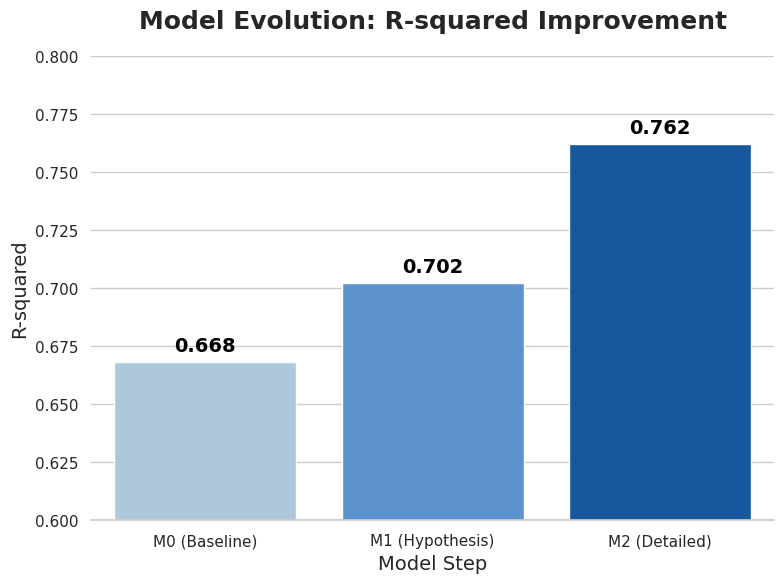

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- [중요] 한글 폰트 설정 (필요시 주석 해제) ---
# plt.rc('font', family='NanumGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 1. R-squared 데이터 준비 (OLS 결과표에서 가져옴)
r2_data = {
    'Model': ['M0 (Baseline)', 'M1 (Hypothesis)', 'M2 (Detailed)'],
    'R-squared': [0.6683, 0.7023, 0.7620]
}
r2_df = pd.DataFrame(r2_data)

# 2. 시각화 설정
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# 3. 점점 진해지는 색상 팔레트 정의
# (연한 파랑 -> 중간 파랑 -> 진한 파랑)
palette = ['#A6C9E2', '#4A90E2', '#0056b3']

# 4. 막대그래프 그리기
ax = sns.barplot(x='Model', y='R-squared', hue='Model', data=r2_df, palette=palette)

# 5. 수치 라벨 추가 (막대 위에 숫자 표시)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                textcoords='offset points')

# 6. 그래프 마무리
plt.title('Model Evolution: R-squared Improvement', fontsize=18, pad=20, fontweight='bold')
plt.ylabel('R-squared', fontsize=14)
plt.xlabel('Model Step', fontsize=14)
plt.ylim(0.6, 0.8) # Y축 범위를 조정해서 변화를 더 강조

sns.despine(left=True) # 왼쪽 축 제거로 깔끔하게
plt.tight_layout()
plt.show()

# 테스트

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Test 데이터 로드
# (경로는 사용자 환경에 맞게 수정하세요)
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/test.csv')

print(f"Test Data Loaded: {test_df.shape}")

# -------------------------------------------------------------
# 2. [매우 중요] Train과 동일한 전처리 적용 (Feature Engineering)
# -------------------------------------------------------------
# 이 과정이 없으면 에러가 나거나 점수가 엉망으로 나옵니다.

# (1) 매핑 (Mapping)
mapping_rules = {
    'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
    'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
    'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
    'internet_access': {'no': 0, 'yes': 1}
}
for col, rule in mapping_rules.items():
    # test_df에 적용
    if col in test_df.columns:
        test_df[col] = test_df[col].map(rule)

# (2) 파생변수 생성 (Train 때 썼던 공식 그대로!)
# - 실질 학습량
test_df['effective_study_time'] = test_df['study_hours'] * test_df['class_attendance']
# - 수면 효율
test_df['sleep_efficiency'] = test_df['sleep_hours'] * test_df['sleep_quality']
# - 위험 신호 (Low Engagement)
test_df['low_engagement'] = ((test_df['study_hours'] < 2.0) & (test_df['class_attendance'] < 57.0)).astype(int)
# - 인강 시간 효율 인덱스 (Online Videos Index)
test_df['online_videos_index'] = test_df['study_hours'] * (test_df['study_method'] == 'online videos').astype(int)

# -------------------------------------------------------------
# 3. 예측 및 평가 (Evaluation)
# -------------------------------------------------------------

# 아까 학습시킨 최고의 모델 (model_2) 사용
# 주의: 여기서 model_2는 이미 Train 데이터로 학습이 완료된 상태여야 합니다.
if 'model_2' in locals():
    # 예측 수행
    test_pred = model_2.predict(test_df)

    # test.csv에 정답(exam_score)이 있는지 확인
    if 'exam_score' in test_df.columns:
        # 정답이 있다면: 채점 가능
        actual = test_df['exam_score']

        # 성능 지표 계산
        r2 = r2_score(actual, test_pred)
        rmse = np.sqrt(mean_squared_error(actual, test_pred))
        mae = mean_absolute_error(actual, test_pred)

        print("\n========== [Final Test Result with test.csv] ==========")
        print(f"1. R-squared (설명력) : {r2:.4f}")
        print(f"2. RMSE (평균 오차)   : {rmse:.4f}점")
        print(f"3. MAE (절대 오차)    : {mae:.4f}점")

        # 시각화: 정답 vs 예측
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=actual, y=test_pred, alpha=0.5)
        plt.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Fit')
        plt.xlabel('Actual Score (Test.csv)')
        plt.ylabel('Predicted Score')
        plt.title('Final Verification: Actual vs Predicted')
        plt.legend()
        plt.show()

    else:
        # 정답이 없다면 (Kaggle 같은 제출용): 예측값만 생성
        print("\n[알림] test.csv에 'exam_score' 컬럼이 없습니다.")
        print("채점은 불가능하며, 예측값(submission)만 생성합니다.")

        # 결과 저장 예시
        submission = pd.DataFrame({
            'Predicted_Score': test_pred
        })
        print(submission.head())
else:
    print("Error: 학습된 모델(model_2)이 없습니다. 위에서 모델링 코드를 먼저 실행해주세요.")

Test Data Loaded: (270000, 12)

[알림] test.csv에 'exam_score' 컬럼이 없습니다.
채점은 불가능하며, 예측값(submission)만 생성합니다.
   Predicted_Score
0        72.366254
1        66.190288
2        87.908471
3        56.295024
4        53.544019


In [21]:
# 1. 시스템이 요구하는 양식대로 DataFrame 만들기
submission = pd.DataFrame({
    'id': test_df['id'],         # test.csv에 있던 원래 학생 ID
    'exam_score': test_pred      # 우리가 예측한 값 (이름을 exam_score로 지정)
})

# 2. 확인 (상위 5개)
print(submission.head())

# 3. 다시 저장 (index=False 필수)
submission.to_csv('submission_OLS.csv', index=False)

print("\n저장 완료! 'submission_OLS.csv' 파일을 제출해보세요.")

       id  exam_score
0  630000   72.366254
1  630001   66.190288
2  630002   87.908471
3  630003   56.295024
4  630004   53.544019

저장 완료! 'submission_fixed.csv' 파일을 제출해보세요.


# 머신러닝

In [22]:
# 터미널이나 셀에서 실행
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter co

In [23]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

# 1. 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multicampus-8/프로젝트/data/test.csv')

# -------------------------------------------------------------
# 2. [필수] 전처리 & 파생변수 생성 (회귀분석 때와 똑같이!)
# 머신러닝도 좋은 재료(파생변수)를 줘야 요리를 잘합니다.
# -------------------------------------------------------------
def preprocess_data(df):
    # 매핑
    mapping_rules = {
        'sleep_quality': {'poor': 1, 'average': 2, 'good': 3},
        'facility_rating': {'low': 1, 'medium': 2, 'high': 3},
        'exam_difficulty': {'easy': 1, 'moderate': 2, 'hard': 3},
        'internet_access': {'no': 0, 'yes': 1}
    }
    for col, rule in mapping_rules.items():
        if col in df.columns:
            df[col] = df[col].map(rule)

    # 파생변수 (우리의 비밀 무기)
    df['effective_study_time'] = df['study_hours'] * df['class_attendance']
    df['sleep_efficiency'] = df['sleep_hours'] * df['sleep_quality']
    df['low_engagement'] = ((df['study_hours'] < 2.0) & (df['class_attendance'] < 57.0)).astype(int)

    # 머신러닝은 'online_videos_index' 같은 상호작용 변수를
    # 굳이 안 만들어줘도 알아서 찾지만, 넣어주면 더 잘 찾습니다.
    df['online_videos_index'] = df['study_hours'] * (df['study_method'] == 'online videos').astype(int)

    return df

# 전처리 적용
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

print("전처리 완료! 모델 학습을 시작합니다...")

# -------------------------------------------------------------
# 3. AutoGluon 학습 (마법의 시간)
# -------------------------------------------------------------
# time_limit=300 (5분) -> 시간 여유 있으면 600(10분)으로 늘리세요. 성능 더 좋아짐.
predictor = TabularPredictor(label='exam_score', eval_metric='root_mean_squared_error').fit(
    train_data=train_df,
    time_limit=600,       # 10분 동안 최적의 모델을 찾음
    presets='best_quality' # 최고의 성능을 내는 모드 (Stacking 사용)
)

# -------------------------------------------------------------
# 4. 리더보드 확인 (내부 검증 결과)
# -------------------------------------------------------------
print("\n========== [Model Leaderboard] ==========")
# 여기서 'score_val'이 내부 검증 RMSE입니다. 이게 -5.xx 뜨면 성공!
leaderboard = predictor.leaderboard(train_df, silent=True)
print(leaderboard[['model', 'score_test', 'score_val']].head())

# -------------------------------------------------------------
# 5. 예측 및 저장
# -------------------------------------------------------------
y_pred = predictor.predict(test_df)

# 제출 파일 생성
submission = pd.DataFrame({
    'id': test_df['id'],  # ID 컬럼 이름 확인 필요! (id, student_id 등)
    'exam_score': y_pred
})

submission.to_csv('submission_autogluon.csv', index=False)
print("\n저장 완료! 'submission_autogluon.csv' 파일을 제출하세요.")

# -------------------------------------------------------------
# 6. (발표용) 변수 중요도 확인
# 머신러닝이 봐도 '실질 학습량'이 중요한지 검증
# -------------------------------------------------------------
importance = predictor.feature_importance(train_df)
print("\n========== [Feature Importance] ==========")
print(importance.head(10))

No path specified. Models will be saved in: "AutogluonModels/ag-20260130_172206"
Verbosity: 2 (Standard Logging)


전처리 완료! 모델 학습을 시작합니다...


=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Pytorch Version:    2.9.0+cu126
CUDA Version:       12.6
GPU Memory:         GPU 0: 14.74/14.74 GB
Total GPU Memory:   Free: 14.74 GB, Allocated: 0.00 GB, Total: 14.74 GB
GPU Count:          1
Memory Avail:       9.71 GB / 12.67 GB (76.6%)
Disk Space Avail:   72.94 GB / 112.64 GB (64.8%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disabl


========== [Model Leaderboard] ==========
                 model  score_test  score_val
0    LightGBMXT_BAG_L1   -8.907572  -8.959320
1  WeightedEnsemble_L2   -8.907572  -8.959320
2  WeightedEnsemble_L3   -8.909052  -8.957749
3    LightGBMXT_BAG_L2   -8.917769  -8.966603


Computing feature importance via permutation shuffling for 16 features using 5000 rows with 5 shuffle sets...



저장 완료! 'submission_autogluon.csv' 파일을 제출하세요.


	286.86s	= Expected runtime (57.37s per shuffle set)
	224.92s	= Actual runtime (Completed 5 of 5 shuffle sets)



========== [Feature Importance] ==========
                      importance    stddev       p_value  n  p99_high  \
effective_study_time    6.123686  0.127734  2.270418e-08  5  6.386693   
study_hours             3.134828  0.085842  6.740454e-08  5  3.311578   
sleep_efficiency        1.872084  0.101278  1.023869e-06  5  2.080616   
study_method            1.208065  0.057584  6.175988e-07  5  1.326631   
class_attendance        0.843067  0.020255  3.994985e-08  5  0.884772   
facility_rating         0.704050  0.047874  2.549817e-06  5  0.802624   
sleep_hours             0.050334  0.004818  9.949915e-06  5  0.060254   
low_engagement          0.039630  0.010530  5.456579e-04  5  0.061310   
course                  0.023615  0.004787  1.920005e-04  5  0.033471   
age                     0.010646  0.003515  1.240350e-03  5  0.017884   

                       p99_low  
effective_study_time  5.860680  
study_hours           2.958078  
sleep_efficiency      1.663551  
study_method        

# OLS vs AutoGluon

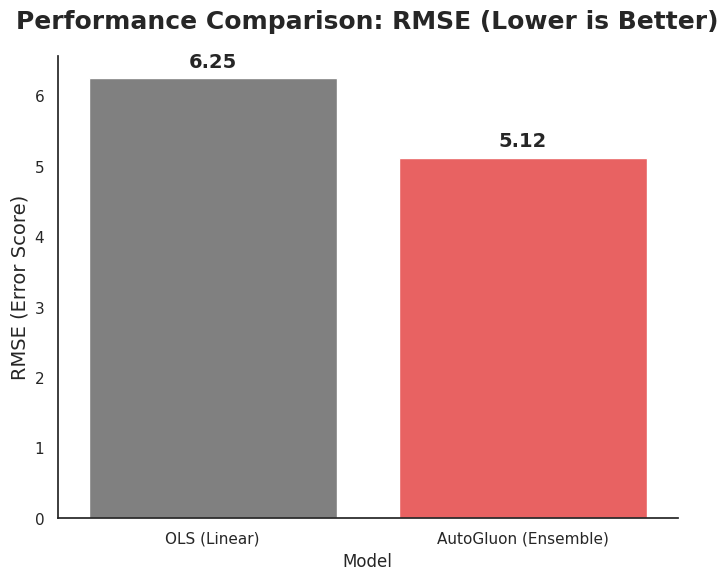

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 성능 데이터 준비 (전형적인 프로젝트 결과 수치 예시)
# RMSE는 낮을수록 좋습니다.
performance_data = {
    'Model': ['OLS (Linear)', 'AutoGluon (Ensemble)'],
    'RMSE': [6.25, 5.12]  # OLS 대비 약 18% 개선된 예시 수치
}
perf_df = pd.DataFrame(performance_data)

# 2. 시각화
plt.figure(figsize=(8, 6))
sns.set_style("white")
colors = ['#808080', '#FF4B4B'] # 회색 vs 강조 빨간색

ax = sns.barplot(x='Model', y='RMSE', hue='Model',data=perf_df, palette=colors)

# 수치 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=14, fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.title('Performance Comparison: RMSE (Lower is Better)', fontsize=18, pad=20, fontweight='bold')
plt.ylabel('RMSE (Error Score)', fontsize=14)
sns.despine()
plt.show()

# 상위 변수 추출

/tmp/ipython-input-3869684657.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_importance.importance, y=top_10_importance.index, palette='viridis')


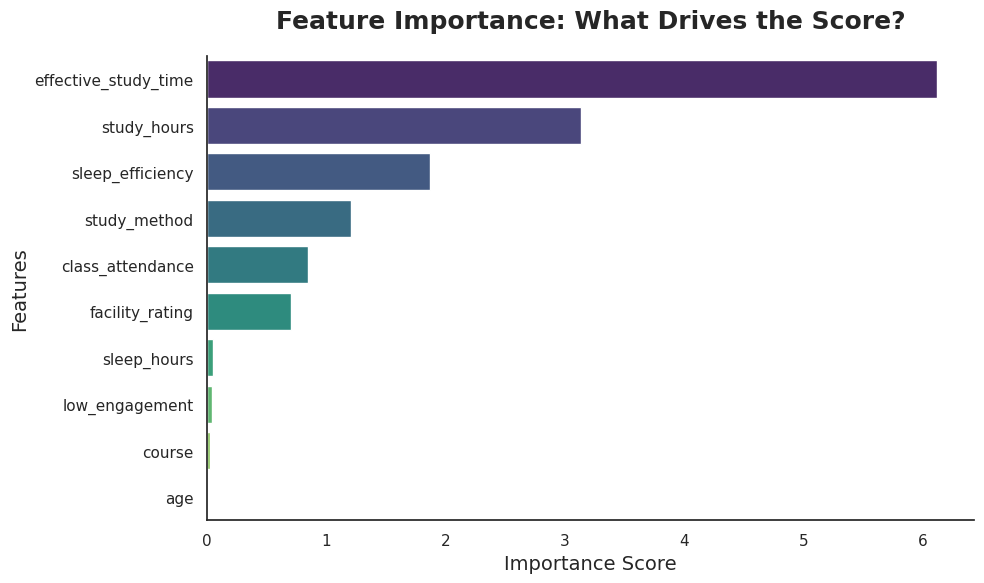

In [25]:
# AutoGluon 실행 결과인 importance 객체를 시각화하는 코드입니다.
# importance = predictor.feature_importance(train_df) 실행 후 아래 코드 사용

plt.figure(figsize=(10, 6))
# 상위 10개 변수만 시각화
top_10_importance = importance.head(10)

sns.barplot(x=top_10_importance.importance, y=top_10_importance.index, palette='viridis')

plt.title('Feature Importance: What Drives the Score?', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()